In [9]:
using Plots

In [6]:
function euler(f::Function, t0::Real, y0::Real, dt::Real, num_steps::Integer)
  num_steps > 0 || throw(ArgumentError("The number of steps must be positive."))
  dt > 0 || throw(ArgumentError("The step size dt must be positive."))
  t = LinRange(t0,t0+num_steps*dt,num_steps+1)
  y = zeros(Float64,num_steps+1)
  y[1] = y0
  for i=1:num_steps
    y[i+1] = y[i] + dt*f(t[i],y[i])
  end
  (collect(t),y)
end

euler (generic function with 1 method)

In [7]:
t,y = euler( (t,y) -> y, 0, 1, 0.1, 10)

([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], [1.0, 1.1, 1.2100000000000002, 1.3310000000000002, 1.4641000000000002, 1.61051, 1.7715610000000002, 1.9487171, 2.1435888100000002, 2.357947691, 2.5937424601])

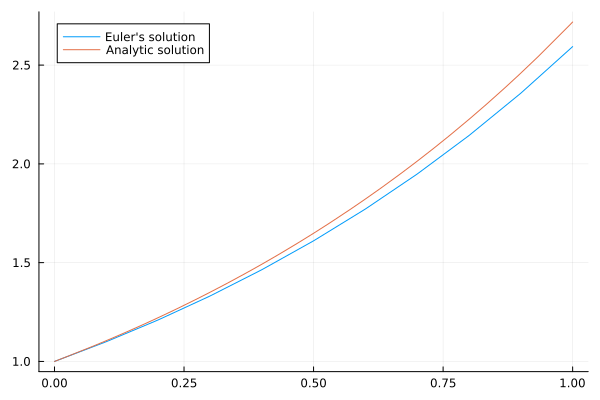

In [10]:
plot(t,y,label="Euler's solution")
plot!(t->exp(t),0,1,label="Analytic solution")

In [11]:
savefig("../assets/plots/diffeqn/euler.png")

"/Users/pstaab/code/sci-comp-book/assets/plots/diffeqn/euler.png"